In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
titanics=pd.read_csv("Titanic_Research_v6.csv",sep= ";") # we use sep bcoz the csv file is separated by semicolon.
#clean titanics as pandas cat presentation is after machine learning.

In [11]:
titanics.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [12]:
titanics.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age             9
sibsp           1
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest       6
dtype: int64

# The home.dest attribute has too few existing values, the boat attribute is only present for passengers who have survived,and the body attribute is only for passengers who have not survived.We will discard these three columnslater on while using the data schema.

In [13]:
#titanics.drop(['home.dest'], axis = 1, inplace = True)
del titanics['home.dest']

In [14]:
#titanics.drop(['boat'], axis = 1, inplace = True)
del titanics['boat']

In [15]:
#titanics.drop(['body'], axis = 1, inplace = True)
del titanics['body']

In [16]:
titanics.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked'],
      dtype='object')

In [17]:
titanics

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0.0,0,24160,2.113.375,B5,S
1,1,1,"Allison, Master. Hudson Trevor",male,"0,92",1.0,2,113781,151.55,C22 C26,S
2,1,0,"Allison, Miss. Helen Loraine",female,2,1.0,2,113781,151.55,C22 C26,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1.0,2,113781,151.55,C22 C26,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1.0,2,113781,151.55,C22 C26,S
...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,"16,0",1.0,0,2665,144.542,NaN,C
1305,3,0,"Zabour, Miss. Thamine",female,"19,0",1.0,0,2665,144.542,NaN,C
1306,3,0,"Zakarian, Mr. Mapriededer",male,"22,0",0.0,0,2656,7.225,NaN,C
1307,3,0,"Zakarian, Mr. Ortin",male,"27,0",0.0,0,2670,7.225,NaN,C


In [18]:
titanics.isnull().sum()

pclass         0
survived       0
name           0
sex            0
age            9
sibsp          1
parch          0
ticket         0
fare           1
cabin       1014
embarked       2
dtype: int64

## We may want to complete Age feature as it is definitely correlated to survival.We may want to complete the Embarked feature as it may also correlate with survival or another important feature.

In [19]:
'''1.ticket feature may be dropped from our analysis because may not be a correlation between Ticket and survival.
2.Cabin feature may be dropped as it is highly incomplete or contains many null values 
3.PassengerId may be dropped from training dataset as it does not contribute to survival.


5.We may want to create new feature for Age bands. This turns a continous numerical feature into an ordinal categorical feature.
6.We may also want to create a Fare range feature if it helps our analysis.'''

'1.ticket feature may be dropped from our analysis because may not be a correlation between Ticket and survival.\n2.Cabin feature may be dropped as it is highly incomplete or contains many null values \n3.PassengerId may be dropped from training dataset as it does not contribute to survival.\n\n\n5.We may want to create new feature for Age bands. This turns a continous numerical feature into an ordinal categorical feature.\n6.We may also want to create a Fare range feature if it helps our analysis.'

In [20]:
'''We may also add to our assumptions based on the problem description noted earlier.

Women (Sex=female) were more likely to have survived.
Children (Age<?) were more likely to have survived.
The upper-class passengers (Pclass=1) were more likely to have survived.'''

'We may also add to our assumptions based on the problem description noted earlier.\n\nWomen (Sex=female) were more likely to have survived.\nChildren (Age<?) were more likely to have survived.\nThe upper-class passengers (Pclass=1) were more likely to have survived.'

In [21]:
titanics.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked'],
      dtype='object')

In [22]:
del titanics['ticket']

In [23]:
del titanics['cabin']

In [24]:
titanics.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked'],
      dtype='object')

In [25]:
titanics.isnull().sum()

pclass      0
survived    0
name        0
sex         0
age         9
sibsp       1
parch       0
fare        1
embarked    2
dtype: int64

In [26]:
#.We may want to engineer the Name feature to extract Title as a new feature.
titles = []
for i in titanics['name']:
    split_name = i.split()#split all the names
    name_l =[]
    for j in split_name: #access each splitted name
        if j[-1] == ".": # if the last value denoted by index -1 is a full stop, print the name.
            name_l.append(j)# add the names to the title list
    if len(name_l)>1:
        print(name_l)
    titles.append(name_l[0])
titanics['titles']=titles


['Mrs.', 'L.']


In [27]:
titanics.isnull().sum()

pclass      0
survived    0
name        0
sex         0
age         9
sibsp       1
parch       0
fare        1
embarked    2
titles      0
dtype: int64

In [28]:
titanics.age

0         29
1       0,92
2          2
3         30
4         25
        ... 
1304    16,0
1305    19,0
1306    22,0
1307    27,0
1308    29,0
Name: age, Length: 1309, dtype: object

In [29]:
titanics['age']= titanics['age'].astype(str)

In [30]:
titanics['age']= titanics['age'].apply(lambda x: x.replace(',','.'))

In [31]:
titanics['age']= titanics['age'].astype(float)

In [32]:
titanics['age'] = titanics['age'].apply(lambda x: x*100 if x < 1 else x)

In [33]:
titanics['age']

0       29.0
1       92.0
2        2.0
3       30.0
4       25.0
        ... 
1304    16.0
1305    19.0
1306    22.0
1307    27.0
1308    29.0
Name: age, Length: 1309, dtype: float64

In [34]:
titanics.isnull().sum()

pclass      0
survived    0
name        0
sex         0
age         9
sibsp       1
parch       0
fare        1
embarked    2
titles      0
dtype: int64

In [35]:
titanics.age.describe()

count    1300.000000
mean       30.139538
std        14.296903
min         1.000000
25%        21.000000
50%        28.000000
75%        38.000000
max        92.000000
Name: age, dtype: float64

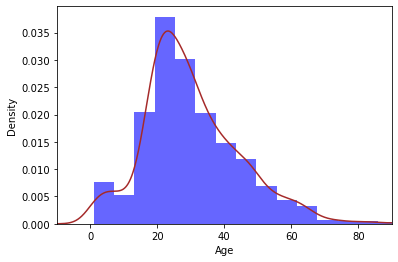

In [36]:
ax = titanics["age"].hist(bins=15, density=True, stacked=True, color='blue', alpha=0.6)
titanics["age"].plot(kind='density', color='brown')
ax.set(xlabel='Age')
plt.xlim(-10,90)
plt.show()
# data is skewed to the left. filling in na values with mean will be inappropriate

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


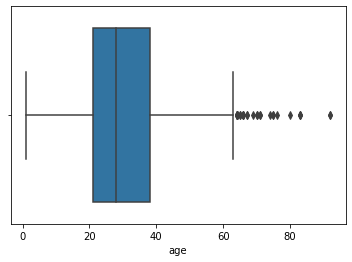

In [37]:
sns.boxplot(titanics['age']);
#age mean is biased since data is skewed

In [38]:
titanics['age'].median()

28.0

In [39]:
titanics['age'].fillna(titanics["age"].median(skipna=True), inplace= True)

In [40]:
titanics.isnull().sum()

pclass      0
survived    0
name        0
sex         0
age         0
sibsp       1
parch       0
fare        1
embarked    2
titles      0
dtype: int64

In [41]:
titanics.fare

0       2.113.375
1          151.55
2          151.55
3          151.55
4          151.55
          ...    
1304      144.542
1305      144.542
1306        7.225
1307        7.225
1308        7.875
Name: fare, Length: 1309, dtype: object

In [42]:
titanics["embarked"].fillna(titanics["embarked"].value_counts().idxmax(), inplace=True)
#filling embarked with mode since it is categorical column

In [43]:
titanics['fare'] = titanics['fare'].astype(str)

In [44]:
titanics['fare'] =titanics['fare'].apply(lambda x: x.replace('.',',',1))

In [45]:
titanics['fare']

0       2,113.375
1          151,55
2          151,55
3          151,55
4          151,55
          ...    
1304      144,542
1305      144,542
1306        7,225
1307        7,225
1308        7,875
Name: fare, Length: 1309, dtype: object

In [46]:
titanics["fare"] = [float(str(i).replace(",", "")) for i in titanics["fare"]]

In [47]:
titanics['fare'] = titanics['fare'].astype(float)

In [48]:
titanics['fare']

0         2113.375
1        15155.000
2        15155.000
3        15155.000
4        15155.000
           ...    
1304    144542.000
1305    144542.000
1306      7225.000
1307      7225.000
1308      7875.000
Name: fare, Length: 1309, dtype: float64

In [49]:
titanics['fare'].describe()

count      1308.000000
mean      75056.963972
std      163516.338201
min           0.000000
25%         161.000000
50%        2115.000000
75%       78542.000000
max      910792.000000
Name: fare, dtype: float64

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


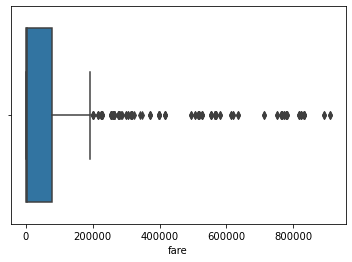

In [50]:
sns.boxplot(titanics['fare']);
#presence of many outliers means we will not fill na using mean.

In [51]:
titanics['fare'].median()

2115.0

In [52]:
titanics['fare'].fillna(titanics['fare'].median(skipna=True), inplace = True)

In [53]:
titanics.isnull().sum()

pclass      0
survived    0
name        0
sex         0
age         0
sibsp       1
parch       0
fare        0
embarked    0
titles      0
dtype: int64

In [54]:
titanics.sibsp

0       0.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
1304    1.0
1305    1.0
1306    0.0
1307    0.0
1308    0.0
Name: sibsp, Length: 1309, dtype: float64

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


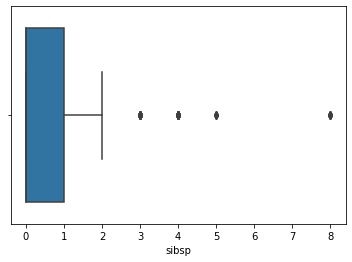

In [55]:
sns.boxplot(titanics['sibsp']);
# we will use median to fill in since the data is skewed i.e mean is biased

In [56]:
titanics['sibsp'].median()

0.0

In [57]:
titanics['sibsp'].fillna(titanics['sibsp'].median(skipna=True), inplace= True)

In [58]:
titanics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   survived  1309 non-null   int64  
 2   name      1309 non-null   object 
 3   sex       1309 non-null   object 
 4   age       1309 non-null   float64
 5   sibsp     1309 non-null   float64
 6   parch     1309 non-null   int64  
 7   fare      1309 non-null   float64
 8   embarked  1309 non-null   object 
 9   titles    1309 non-null   object 
dtypes: float64(3), int64(3), object(4)
memory usage: 102.4+ KB


In [59]:
titanics.to_csv("StarWars.csv")